Resources used for completion of this task:

    - Coursera. (n.d.). Medical Insurance Premium Prediction with Machine Learning [Online course].
      Retrieved February 10, 2025,
      from https://www.coursera.org/learn/medical-insurance-premium-prediction-with-machine-learning
    - Coursera. (n.d.). Logistic Regression with NumPy and Python [Online course].
      Retrieved February 10, 2025,
      from https://www.coursera.org/learn/logistic-regression-numpy-python
    - Liu, Y. (Hayden). (2020). Python machine learning by example: Unlock machine learning best
      practices with real-world use cases (3rd ed.). Packt Publishing.
    - https://statisticsbyjim.com/regression/interpret-r-squared-regression/ [Online resource].
      Retrieved February 13, 2025

In [1]:
# Importing all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
%matplotlib inline


In [3]:
# Reading the data and printing the first 5 registers
data = pd.read_csv('diabetes_dirty.csv')
data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [4]:
# Checking for the columns
data.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6',
       'PROGRESSION'],
      dtype='object')

Differentiate between the independent variables and the dependent
variable, and assign them to variables X and Y.

In [5]:
# Assign to X and y the independent and dependent variables
X = data.drop(columns = ['PROGRESSION'])
y = data[['PROGRESSION']]

#print(X)
#print(y)

In [6]:
# Checking for consistency on the data
X.shape

(442, 10)

In [7]:
y.shape

(442, 1)

Generate training and test sets comprising 80% and 20% of the data respectively.

In [8]:
# Getting the train and test data split into 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Training data:",X_train.shape, y_train.shape)
print("Test data:",X_test.shape, y_test.shape)

Training data: (353, 10) (353, 1)
Test data: (89, 10) (89, 1)


Investigate the necessity for scaling or normalisation of the data. Employ
MinMaxScaler and StandardScaler if necessary. Fit these scalers on the
training set and apply the ﬁtted scalers to transform both the training and
test sets accordingly.

In [9]:
# Scaling the data
scaler_x = StandardScaler()
X_train_standard = scaler_x.fit_transform(X_train)
X_test_standard = scaler_x.transform(X_test)


Generate a multiple linear regression model using the training set. Use all
of the independent variables.

In [10]:
# Initialize and fit the multiple linear regression model
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train_standard, y_train)

LinearRegression()

 Print out the intercept and coefﬁcients of the trained model.

In [11]:
# Printing the intercept and coefficients oth the trained linear regression model
print("Intercept:", multiple_linear_regression.intercept_)
print("Coefficients:", multiple_linear_regression.coef_)

Intercept: [151.60623229]
Coefficients: [[ -1.721465   -11.5856942   27.51069174  14.3712086  -31.22139382
   15.26518393   1.16794747   8.18446857  35.83753415   2.12323129]]


On the coefficients result we can see a direct relationship with disease progression on the positives values.
An example on this model would be the more sugar you eat, the diabetes can get worse

On the other hand, negative values imply an inverse relationship. For example, the more exercise you practice, the slower the progression of diabetes.

Generate predictions for the test set.

In [12]:
# Generate predictions for the test set and display the first 10 predicted values
y_pred = multiple_linear_regression.predict(X_test_standard)
print(y_pred[:10])

[[238.46949509]
 [248.92812015]
 [164.05732579]
 [120.30774826]
 [187.42483427]
 [259.04746969]
 [113.55788482]
 [188.07762807]
 [149.49521726]
 [236.00758247]]


Compute R squared for your model on the test set. You can use r2_score from sklearn.metricsto obtain this score.

In [13]:
# Calculate and print the R-squared score to evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)
print("R squared:", r2)

R squared: 0.3322332173106186


The r2_score is too low, suggesting a weak fit. Meaning the model may not capture all the significant relationship in the data. This also suggest that linear regression may not be the best model.

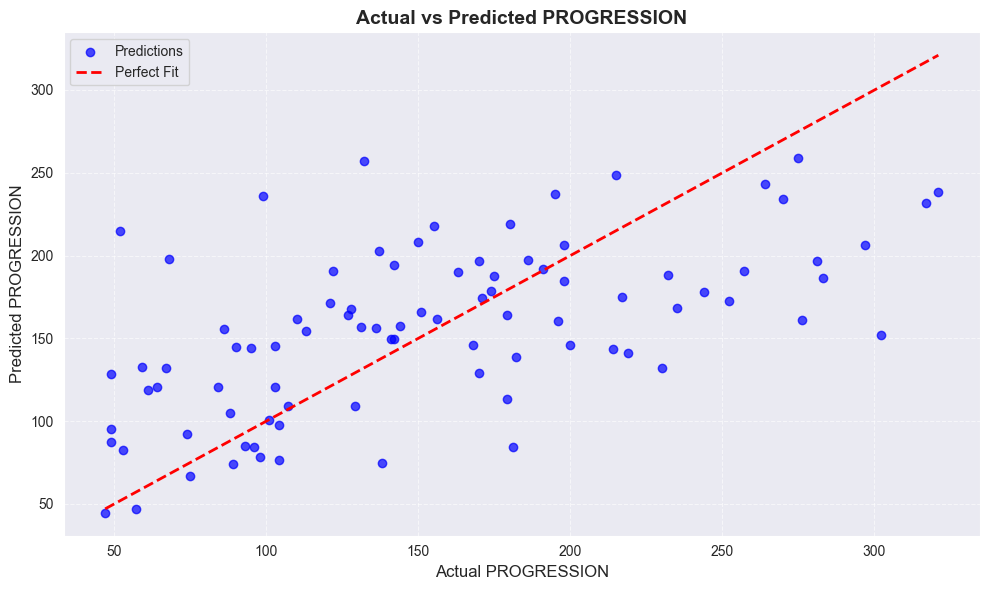

In [14]:
# Scatter plot of actual vs predicted values with enhanced visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',
         lw=2, linestyle='--', label='Perfect Fit')  # Line for perfect predictions
plt.xlabel('Actual PROGRESSION', fontsize=12)
plt.ylabel('Predicted PROGRESSION', fontsize=12)
plt.title('Actual vs Predicted PROGRESSION', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Again we can see a poor relationship between the data as the points
are widely scattered far from the line. Meaning the model is not very precise